<a href="https://colab.research.google.com/github/clar04/analisis-klasifikasi-nasabah/blob/main/5027221016_ClaraValentina_Modul4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum AI/ML Modul 4

| Nama | NRP |
|-----------------------|--------------|
| Clara Valentina | 5027221016 |

### Inisialisasi Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from feature_engine.outliers import Winsorizer

### EDA

In [ ]:
df = pd.read_csv("data_nasabah.csv")
df.drop('ID_Nasabah', axis=1, inplace=True)
df

,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,53.0,Perempuan,3,NaN,Menikah,44280.0,Biru,46,6,2192.0,1146,4756,85,0.523
1,45.0,Perempuan,2,Kuliah,NaN,9982.0,Biru,29,2,1438.3,0,5025,85,0.000
2,40.0,Laki-Laki,2,Kuliah,Belum Menikah,64988.0,Biru,28,1,10880.0,2025,4957,90,0.186
3,53.0,Laki-Laki,4,Kuliah,Belum Menikah,117549.0,Perak,48,5,34516.0,800,3819,72,0.023
4,45.0,Perempuan,4,Sarjana,Menikah,21579.0,Biru,41,5,1927.0,1337,5127,81,0.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,47.0,Laki-Laki,2,NaN,Belum Menikah,85551.0,Biru,41,6,2877.0,1136,4006,68,0.395
1046,44.0,Laki-Laki,1,Tidak Berpendidikan,Bercerai,143802.0,Biru,39,3,11362.0,0,3197,61,0.000
1047,55.0,Perempuan,1,Sarjana,Menikah,NaN,Biru,43,5,3161.0,1389,1547,30,0.439
1048,57.0,Perempuan,3,SMA,Belum Menikah,25111.0,Biru,53,1,3029.0,2214,4750,89,0.731


#### Cek ukuran baris dan kolom

In [ ]:
print('Baris:', df.shape[0])
print('Kolom:', df.shape[1])

Baris: 1050
Kolom: 14


##### Cek Informasi Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Usia_Nasabah                1000 non-null   float64
 1   Jenis_Kelamin               1050 non-null   object 
 2   Jumlah_Tanggungan           1050 non-null   int64  
 3   Tingkat_Pendidikan          883 non-null    object 
 4   Status_Pernikahan           976 non-null    object 
 5   Pendapatan                  932 non-null    float64
 6   Kategori_Kartu              1050 non-null   object 
 7   Lama_Menjadi_Nasabah        1050 non-null   int64  
 8   Jumlah_Layanan              1050 non-null   int64  
 9   Limit_Kredit                1050 non-null   float64
 10  Saldo_Revolting_Total       1050 non-null   int64  
 11  Total_Transaksi             1050 non-null   int64  
 12  Jumlah_Melakukan_Transaksi  1050 non-null   int64  
 13  Rasio_Penggunaan_Rata-rata  1050 

### Visualisasi Data

In [ ]:
categorical_cols = ['Jenis_Kelamin', 'Tingkat_Pendidikan', 'Status_Pernikahan', 'Kategori_Kartu']
numerical_cols = ['Usia_Nasabah', 'Jumlah_Tanggungan', 'Pendapatan', 'Lama_Menjadi_Nasabah', 'Jumlah_Layanan', 'Limit_Kredit', 'Saldo_Revolting_Total', 'Total_Transaksi', 'Jumlah_Melakukan_Transaksi', 'Rasio_Penggunaan_Rata-rata']

#### Distribusi Data Kategorikal

In [ ]:
for col in categorical_cols:
    print("\n", col, ":")
    print(df[col].value_counts())


 Jenis_Kelamin :
Jenis_Kelamin
Perempuan    528
Laki-Laki    522
Name: count, dtype: int64

 Tingkat_Pendidikan :
Tingkat_Pendidikan
Sarjana                329
SMA                    210
Tidak Berpendidikan    143
Kuliah                 102
Post-Graduate           53
Doktor                  46
Name: count, dtype: int64

 Status_Pernikahan :
Status_Pernikahan
Menikah          491
Belum Menikah    404
Bercerai          81
Name: count, dtype: int64

 Kategori_Kartu :
Kategori_Kartu
Biru        981
Perak        59
Emas          8
Platinum      2
Name: count, dtype: int64


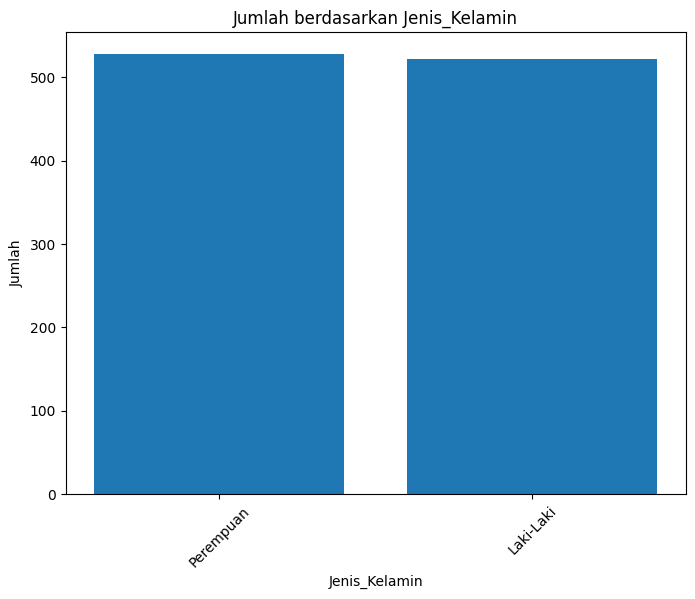

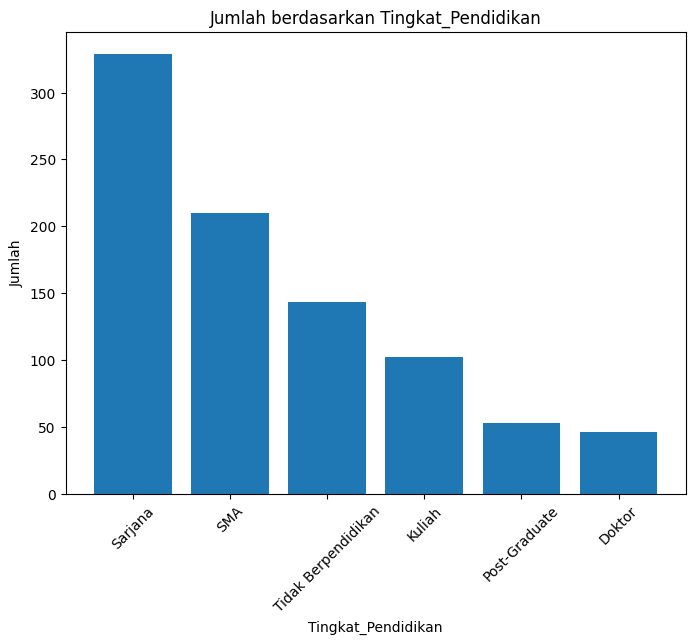

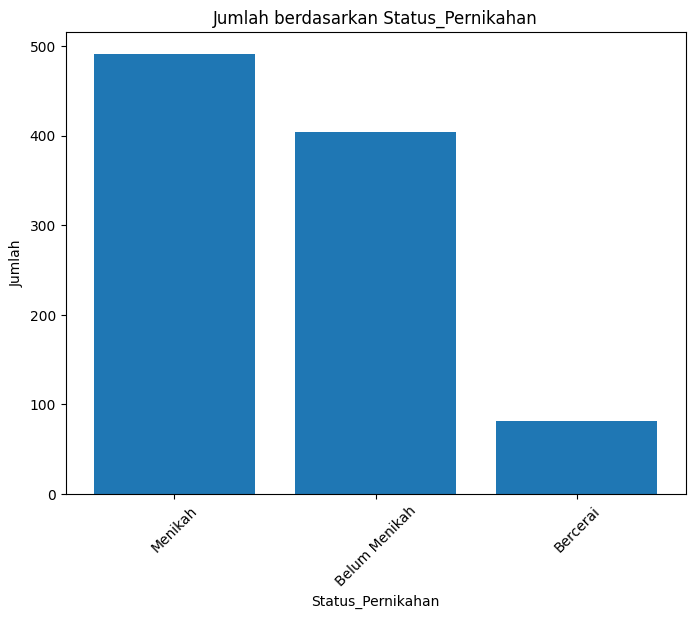

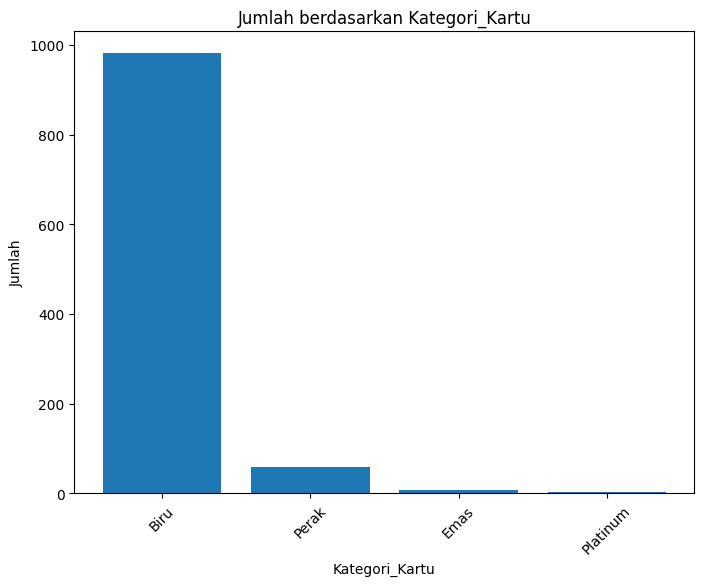

In [ ]:
# Fungsi untuk membuat bar plot
def plot_categorical(df, feature):
    counts = df[feature].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(counts.index, counts.values)
    plt.title(f'Jumlah berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

# Memplot setiap fitur kategorikal
for feature in categorical_cols:
    plot_categorical(df, feature)

##### Distribusi data numerikal

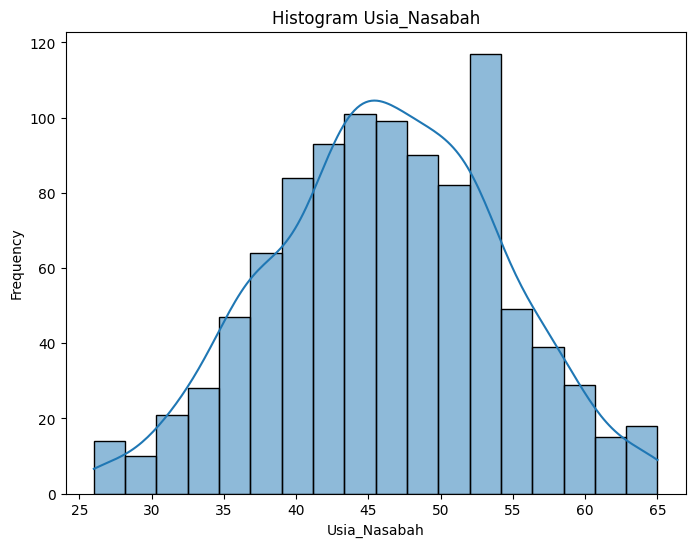

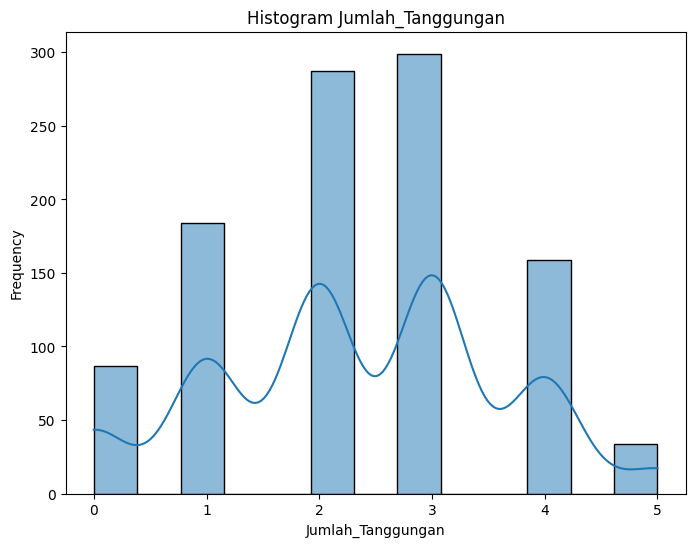

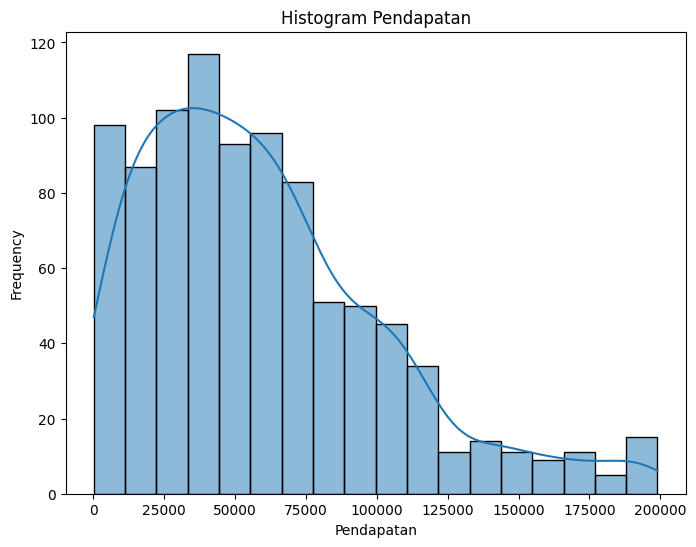

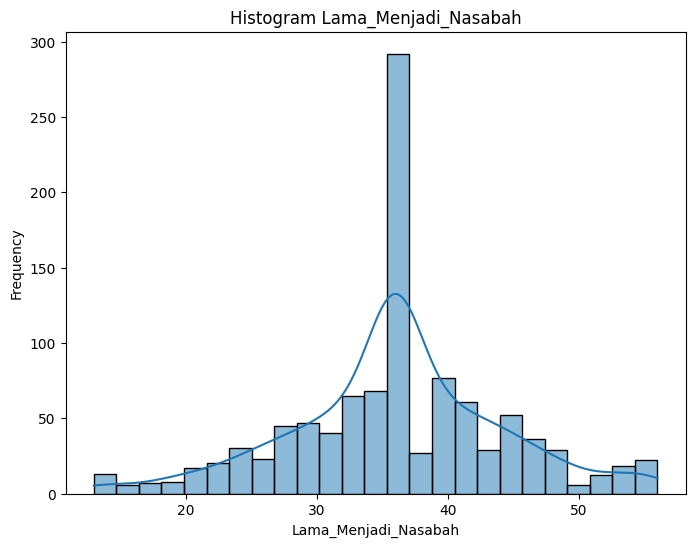

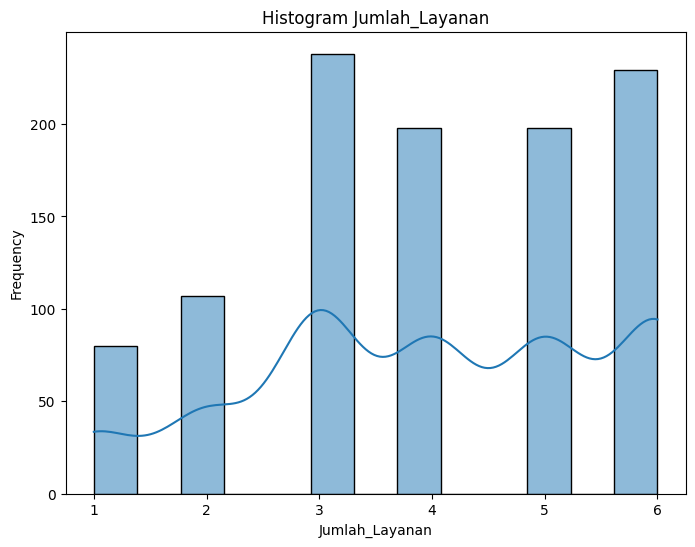

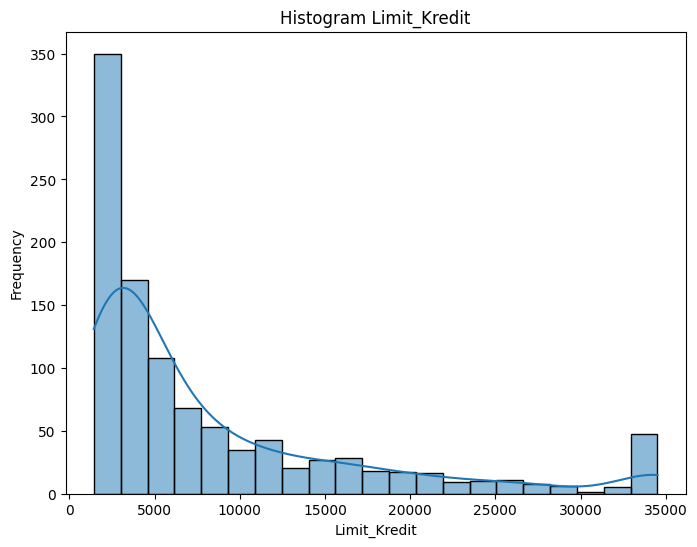

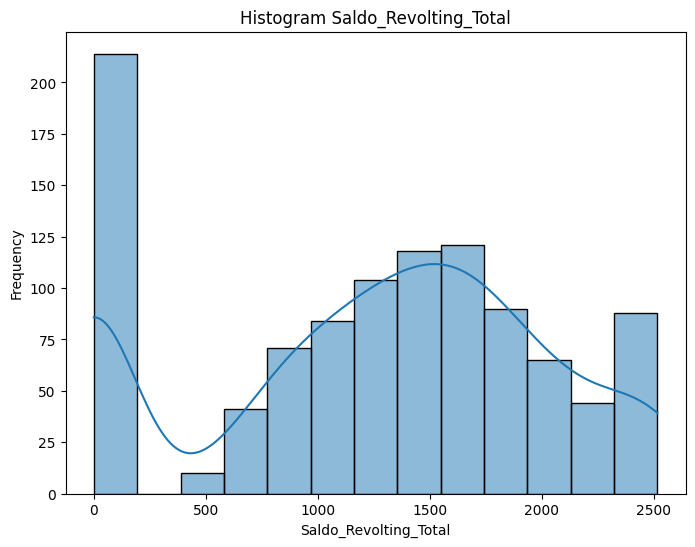

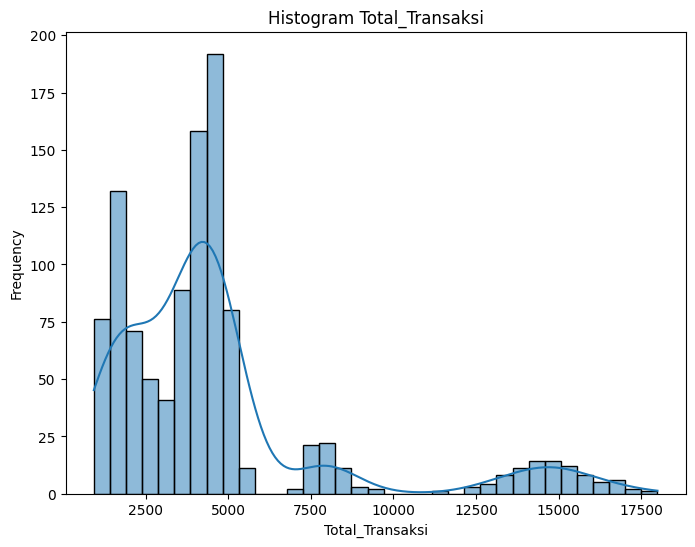

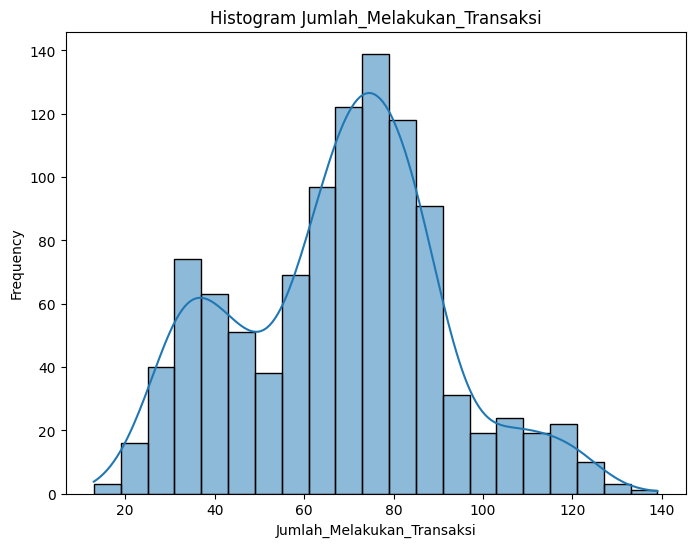

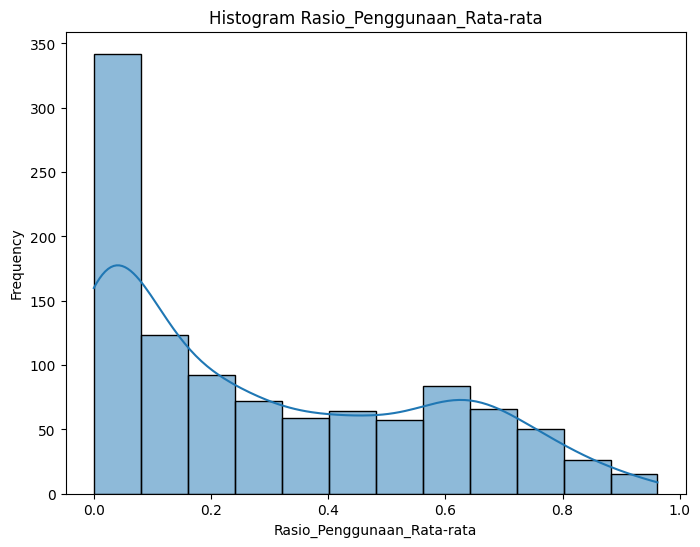

In [ ]:
# buat histogram buat kolom numerikal
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Distribusi Usia dan Jenis Kelamin

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Usia_Nasabah", title = "Distribusi Usia dan Jenis Kelamin ",color="Jenis_Kelamin")
fig.update_layout(bargap=0.2)
fig.show()

Distribusi Kategori Kartu dan Jenis Kelamin

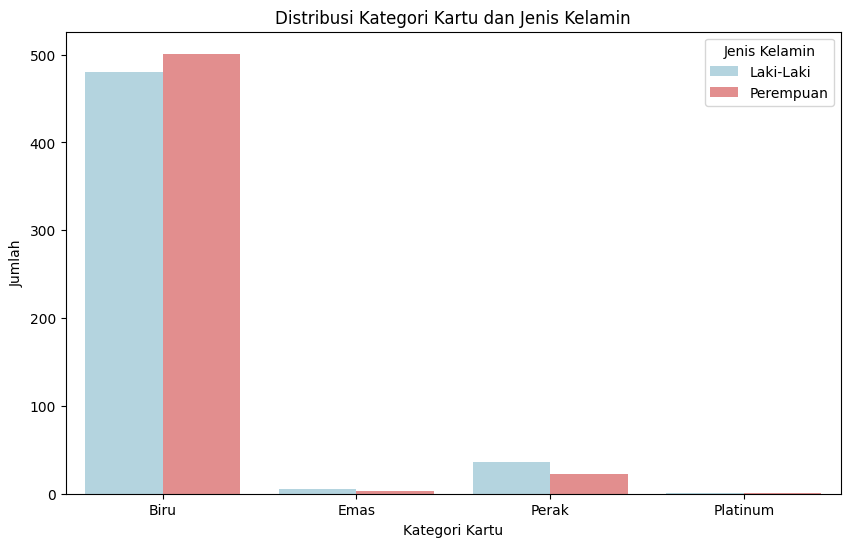

In [ ]:
# Menghitung jumlah Laki-Laki dan Perempuan untuk setiap jenis kartu
jumlah_per_kartu = df.groupby(['Kategori_Kartu', 'Jenis_Kelamin']).size().unstack()

# Mengubah DataFrame ke bentuk yang sesuai untuk plotting
data_visual = df.groupby(['Kategori_Kartu', 'Jenis_Kelamin']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=data_visual, x='Kategori_Kartu', y='count', hue='Jenis_Kelamin', palette=['lightblue', 'lightcoral'])

plt.title('Distribusi Kategori Kartu dan Jenis Kelamin')
plt.xlabel('Kategori Kartu')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Kelamin')

plt.show()

Distribusi Pendapatan dan Jenis Kelamin

In [ ]:
fig = px.histogram(df, x="Pendapatan", title = "Distribusi Pendapatan dan Jenis Kelamin",color="Jenis_Kelamin")
fig.update_layout(bargap=0.2)
fig.show()

Distribusi Pendapatan dan Status Pernikahan

In [ ]:
fig = px.histogram(df, x="Pendapatan", title = "Distribusi Pendapatan dan Status Pernikahan",color="Status_Pernikahan")
fig.update_layout(bargap=0.2)
fig.show()

Distribusi Pendapatan dan Tingkat Pendidikan

In [ ]:
fig = px.histogram(df, x="Pendapatan", title = "Distribusi Pendapatan dan Tingkat Pendidikan",color="Tingkat_Pendidikan")
fig.update_layout(bargap=0.2)
fig.show()

#### Handling Missing Value

Cek missing value di setiap kolom

In [ ]:
df.isna().sum()

Usia_Nasabah                   50
Jenis_Kelamin                   0
Jumlah_Tanggungan               0
Tingkat_Pendidikan            167
Status_Pernikahan              74
Pendapatan                    118
Kategori_Kartu                  0
Lama_Menjadi_Nasabah            0
Jumlah_Layanan                  0
Limit_Kredit                    0
Saldo_Revolting_Total           0
Total_Transaksi                 0
Jumlah_Melakukan_Transaksi      0
Rasio_Penggunaan_Rata-rata      0
dtype: int64

In [ ]:
# Kolom Numerik

num = SimpleImputer(strategy="mean")
cols = ["Usia_Nasabah", "Pendapatan"]
for col in cols:
    df[col] = num.fit_transform(df[[col]]).squeeze()


# Kolom Kategorikal

cat = SimpleImputer(strategy="most_frequent")
cols = ["Tingkat_Pendidikan", "Status_Pernikahan"]
for col in cols:
    df[col] = cat.fit_transform(df[[col]]).squeeze()

# Cek lagi

df.isna().sum()

Usia_Nasabah                  0
Jenis_Kelamin                 0
Jumlah_Tanggungan             0
Tingkat_Pendidikan            0
Status_Pernikahan             0
Pendapatan                    0
Kategori_Kartu                0
Lama_Menjadi_Nasabah          0
Jumlah_Layanan                0
Limit_Kredit                  0
Saldo_Revolting_Total         0
Total_Transaksi               0
Jumlah_Melakukan_Transaksi    0
Rasio_Penggunaan_Rata-rata    0
dtype: int64

## DATA PREPROCESSING

### Encoding

Menggunakan label encoder karena setiap colom yang diencoding  tidak memiliki tingkat yang terukur (ordinal)

// label encoder buat data ordinal/bertingkat, one hot buat ga bertingkat


In [ ]:
# Menyimpan label encoder untuk setiap kolom
label_encoders = {}

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui kolom-kolom kategorikal
categorical_cols = ['Jenis_Kelamin', 'Tingkat_Pendidikan', 'Status_Pernikahan', 'Kategori_Kartu']
for col in categorical_cols:
    # Membuat objek LabelEncoder untuk setiap kolom
    le = LabelEncoder()

    # Menyimpan label encoder untuk kolom ini
    label_encoders[col] = le

    # Menerapkan label encoding dan mengganti nilai dalam DataFrame
    df[col] = le.fit_transform(df[col])

# Mencetak perbandingan sebelum dan setelah encoding
for col in categorical_cols:
    print(f"\nKolom '{col}':")
    print("Label Asli -> Label Encoded")

    # Menggunakan inverse_transform untuk mendapatkan kembali label asli
    encoded_values = df[col].unique()
    original_values = label_encoders[col].inverse_transform(encoded_values)

    for original, encoded in zip(original_values, encoded_values):
        print(f"{original} -> {encoded}")

# Menampilkan DataFrame setelah encoding
print("\nDataFrame setelah encoding:")
print(df)


Kolom 'Jenis_Kelamin':
Label Asli -> Label Encoded
Perempuan -> 1
Laki-Laki -> 0

Kolom 'Tingkat_Pendidikan':
Label Asli -> Label Encoded
Sarjana -> 4
Kuliah -> 1
Tidak Berpendidikan -> 5
SMA -> 3
Doktor -> 0
Post-Graduate -> 2

Kolom 'Status_Pernikahan':
Label Asli -> Label Encoded
Menikah -> 2
Belum Menikah -> 0
Bercerai -> 1

Kolom 'Kategori_Kartu':
Label Asli -> Label Encoded
Biru -> 0
Perak -> 2
Emas -> 1
Platinum -> 3

DataFrame setelah encoding:
      Usia_Nasabah  Jenis_Kelamin  Jumlah_Tanggungan  Tingkat_Pendidikan  \
0             53.0              1                  3                   4   
1             45.0              1                  2                   1   
2             40.0              0                  2                   1   
3             53.0              0                  4                   1   
4             45.0              1                  4                   4   
...            ...            ...                ...                 ...   
1045      

In [ ]:
# Memeriksa hasil transformasi
print(df.head())

   Usia_Nasabah  Jenis_Kelamin  Jumlah_Tanggungan  Tingkat_Pendidikan  \
0          53.0              1                  3                   4   
1          45.0              1                  2                   1   
2          40.0              0                  2                   1   
3          53.0              0                  4                   1   
4          45.0              1                  4                   4   

   Status_Pernikahan  Pendapatan  Kategori_Kartu  Lama_Menjadi_Nasabah  \
0                  2     44280.0               0                    46   
1                  2      9982.0               0                    29   
2                  0     64988.0               0                    28   
3                  0    117549.0               2                    48   
4                  2     21579.0               0                    41   

   Jumlah_Layanan  Limit_Kredit  Saldo_Revolting_Total  Total_Transaksi  \
0               6        2192.0          

### Handling Outlier

Cek Outlier

<Axes: >

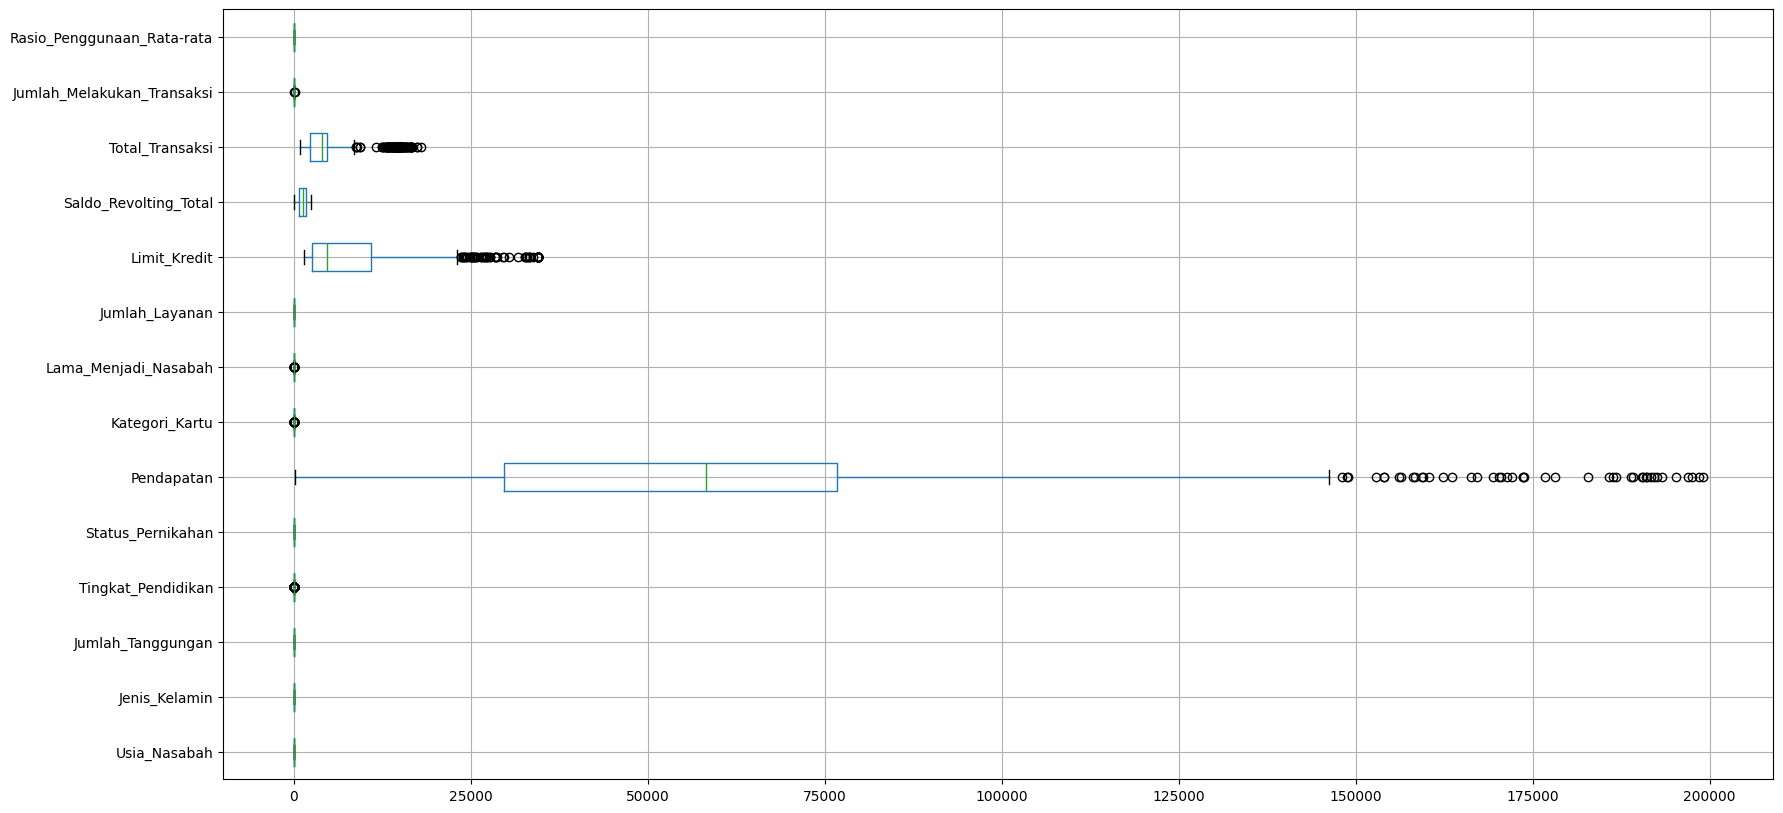

In [ ]:
plt.figure(figsize=(20, 10))
df.boxplot(vert=False)

melakukan handling outlier dengan menggunkan winsorizer dengan metode IQR

In [ ]:
# outlier handling

windsorizer = Winsorizer(
    capping_method="iqr",
    tail="both",
    fold=1.5,
    variables=["Jumlah_Melakukan_Transaksi", "Total_Transaksi", "Limit_Kredit", "Lama_Menjadi_Nasabah","Pendapatan","Tingkat_Pendidikan"],
)

windsorizer.fit(df)
df = windsorizer.transform(df)

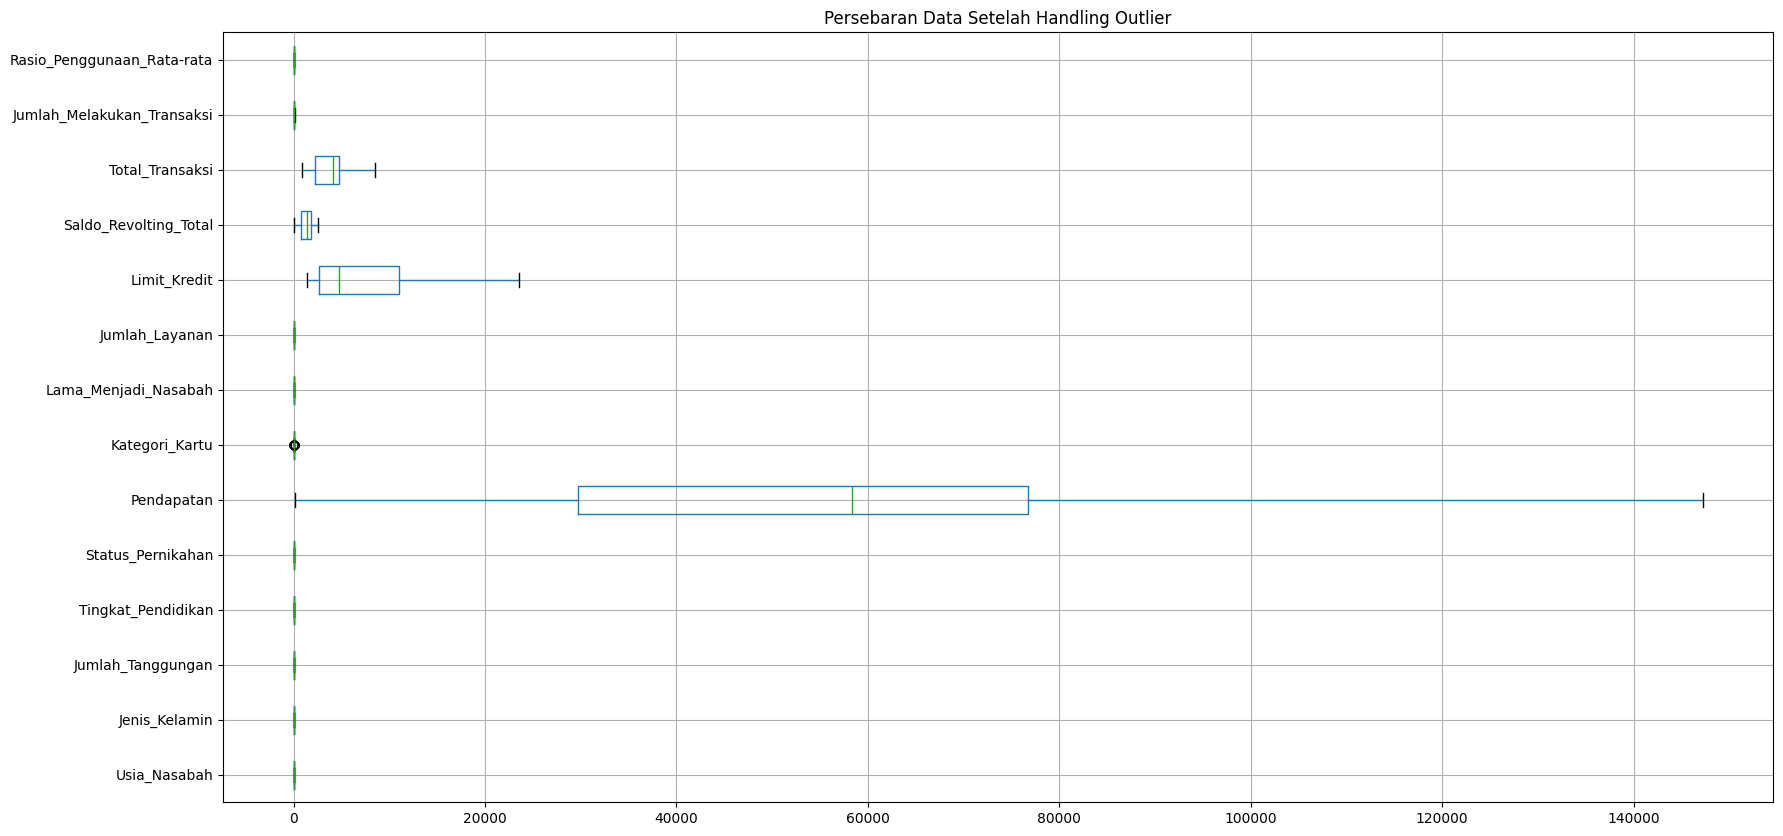

In [ ]:
# after handling outlier
plt.figure(figsize=(20, 10))
df.boxplot(vert=False)
plt.title("Persebaran Data Setelah Handling Outlier")
plt.show()

C:\Users\CLARA VALENTINA\AppData\Local\Temp\ipykernel_21968\4120683760.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



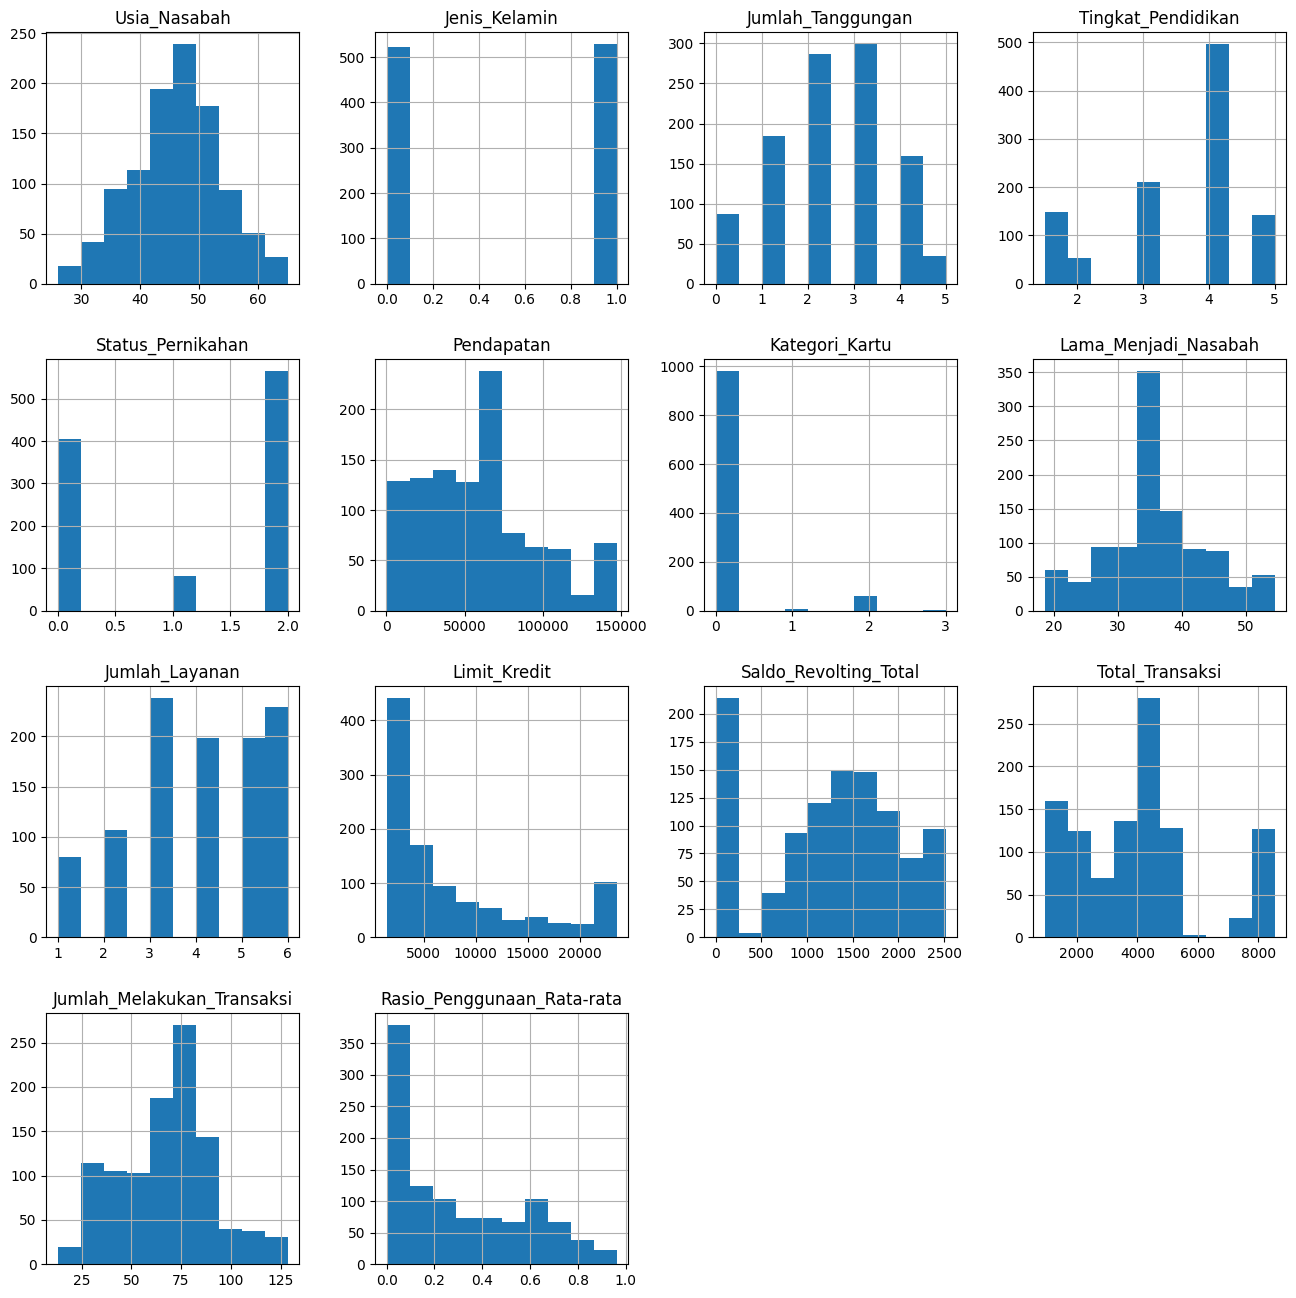

In [ ]:
#menampilkan histogram
fig = plt.figure(figsize=(16, 16))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### Normalisasi


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

scaled_df.head()

,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,0.692308,1.0,0.6,0.714286,1.0,0.300042,0.000000,0.763889,1.0,0.034097,0.455304,0.503093,0.623377,0.543659
1,0.487179,1.0,0.4,0.000000,1.0,0.066801,0.000000,0.291667,0.2,0.000000,0.000000,0.538492,0.623377,0.000000
2,0.358974,0.0,0.4,0.000000,0.0,0.440866,0.000000,0.263889,0.0,0.427135,0.804529,0.529543,0.666667,0.193347
3,0.692308,0.0,0.8,0.000000,0.0,0.798304,0.666667,0.819444,0.8,1.000000,0.317839,0.379787,0.510823,0.023909
4,0.487179,1.0,0.8,0.714286,1.0,0.145665,0.000000,0.625000,0.8,0.022108,0.531188,0.551915,0.588745,0.721414


Heatmap Korelasi

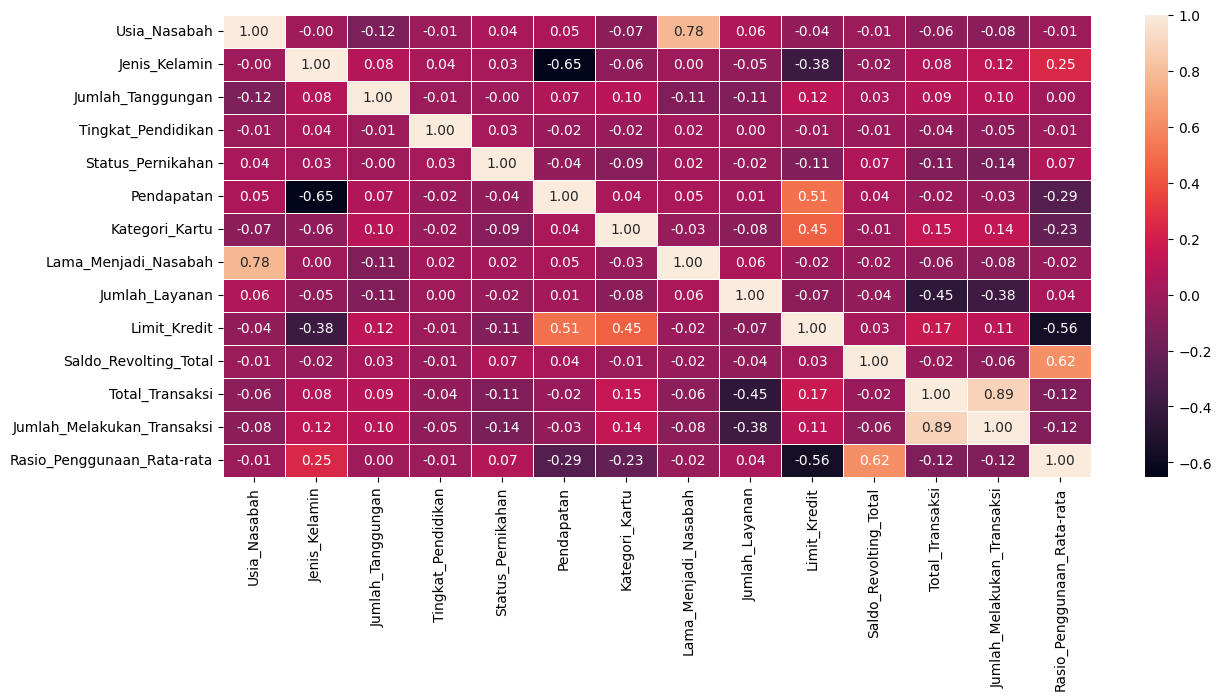

In [ ]:
corr = df.corr()

plt.figure(figsize=(14, 6))
sns.heatmap(corr, fmt='.2f', annot=True, linewidth=.5)
plt.show()

### PCA

Mereduksi data menjadi 2 komponen utama

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(pca_data, columns=["pc1", "pc2"])
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.249 0.179


In [ ]:
pca_data

,pc1,pc2
0,-0.657732,-0.314433
1,-0.592469,-0.107698
2,0.587776,0.519772
3,1.015897,0.514861
4,-0.765866,-0.293091
...,...,...
1045,0.474366,0.344221
1046,0.759534,-0.022165
1047,-0.579137,-0.469758
1048,-0.599789,0.636001


Visualisasi Scatter Plot Hasil PCA

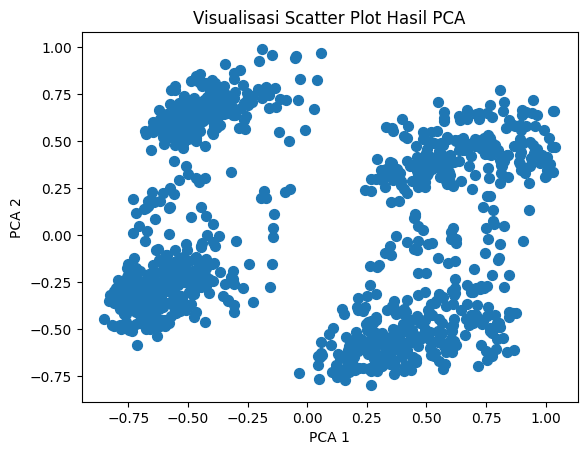

In [ ]:
plt.scatter(pca_data["pc1"], pca_data["pc2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

### Jumlah Cluster optimal &  Silhouette Coefficient

#### KMeans

Mencari jumlah cluster yang optimal dengan Elbow Method

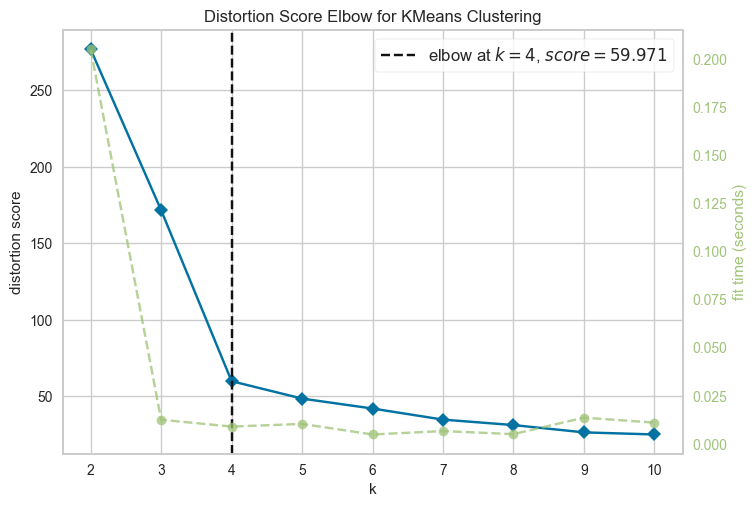

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_data)
Elbow_M.show()


Berdasarkan elbow method tersebut, terlihat bahwa cluster yang optimal adalah berjumlah 4 cluster

In [ ]:
# K-Means Clustering

from sklearn import metrics

kmeans_model = KMeans(n_clusters=4).fit(pca_data)
labels = kmeans_model.labels_

# Menghitung silhouette score
silhouette_score = metrics.silhouette_score(pca_data, labels, metric="euclidean")
print("Silhouette Score for KMeans:", silhouette_score)


Silhouette Score for KMeans: 0.8032164702773316


### DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Fit DBSCAN model
db = DBSCAN(eps=0.3, min_samples=10).fit(pca_data)

# Extract labels (clusters)
labels = db.labels_

# Calculate silhouette score
silhouette = silhouette_score(pca_data, labels, metric="euclidean")
print("Silhouette Score for DBScan :", silhouette)


Silhouette Score for DBScan : 0.8032164702773316


Karena Silhouette scorenya sama, yang digunakan adalah metode clustering dengan KMeans karena memiliki parameter yang jelas yaitu n cluster = 4 berdasarkan elbow methode. Sedangkan DBScan masih memerlukan pengujian terhadap parameter eps dan min_samples yang digunakan.

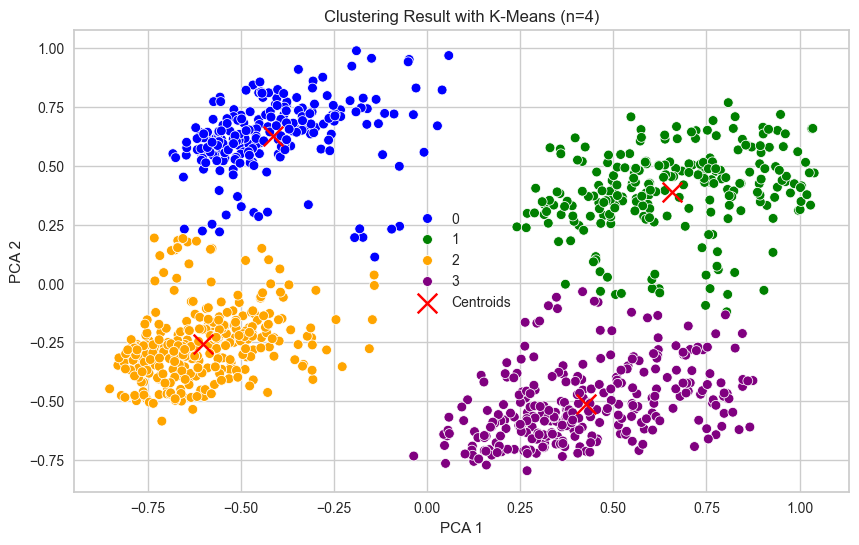

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Asumsikan pca_data adalah DataFrame dengan kolom 'pc1' dan 'pc2'

# Inisialisasi KMeans dengan n_clusters=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Melakukan clustering pada data hasil PCA
kmeans.fit(pca_data)

# Menambahkan label klaster ke DataFrame hasil PCA
pca_data['Cluster'] = kmeans.labels_

# Menentukan centroid dari setiap klaster
df["Clusters"] = kmeans.labels_
centroids = kmeans.cluster_centers_

# Palet warna tetap untuk cluster
cluster_palette = {0: 'blue', 1: 'green', 2: 'orange', 3: 'purple'}

# Visualisasi hasil clustering beserta centroid
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data, x='pc1', y='pc2', hue='Cluster', palette=cluster_palette, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering Result with K-Means (n=4)')
plt.legend()
plt.show()




Mengecek apakah label cluster telah ditambahkan ke dataframe hasil PCA

In [ ]:
df

,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata,Clusters
0,53.0,1,3,4.0,2,44280.00000,0,46.0,6,2192.0,1146,4756,85.0,0.523,2
1,45.0,1,2,1.5,2,9982.00000,0,29.0,2,1438.3,0,5025,85.0,0.000,2
2,40.0,0,2,1.5,0,64988.00000,0,28.0,1,10880.0,2025,4957,90.0,0.186,1
3,53.0,0,4,1.5,0,117549.00000,2,48.0,5,23543.0,800,3819,72.0,0.023,1
4,45.0,1,4,4.0,2,21579.00000,0,41.0,5,1927.0,1337,5127,81.0,0.694,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,47.0,0,2,4.0,0,85551.00000,0,41.0,6,2877.0,1136,4006,68.0,0.395,1
1046,44.0,0,1,5.0,1,143802.00000,0,39.0,3,11362.0,0,3197,61.0,0.000,1
1047,55.0,1,1,4.0,2,59609.14485,0,43.0,5,3161.0,1389,1547,30.0,0.439,2
1048,57.0,1,3,3.0,0,25111.00000,0,53.0,1,3029.0,2214,4750,89.0,0.731,0


## Intrepertasi Cluster

##### Distribusi Jumlah Orang per Cluster

In [ ]:
fig = px.histogram(df, x='Clusters', color='Clusters')
fig.show()

Berdasarkan grafik tersebut,  persebaran jumlah nasabah per cluster tidak berbeda jauh, namun jumlah terbanyak ada pada cluster 2.

##### Distribusi rata-rata pada colom numerikal per cluster

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Daftar kolom yang ingin divisualisasikan
columns_to_visualize = ['Usia_Nasabah', 'Jumlah_Tanggungan', 'Pendapatan', 'Lama_Menjadi_Nasabah',
                        'Jumlah_Layanan', 'Limit_Kredit', 'Saldo_Revolting_Total', 'Total_Transaksi',
                        'Jumlah_Melakukan_Transaksi', 'Rasio_Penggunaan_Rata-rata']

# Ukuran subplot
rows = 5
cols = 3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=columns_to_visualize)

# Iterasi melalui setiap kolom dan membuat subplot untuk masing-masing
for i, colname in enumerate(columns_to_visualize):
    # Kelompokkan data berdasarkan kolom cluster dan hitung rata-rata nilai kolom
    cluster_col_mean = df.groupby('Clusters')[colname].mean().reset_index()

    # Bar chart menggunakan Plotly Express
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Bar(x=cluster_col_mean['Clusters'], y=cluster_col_mean[colname], name='Cluster'),
        row=row, col=col
    )

# Update layout
fig.update_layout(title_text="Rata-rata Nilai Kolom per Cluster", showlegend=False, height=1000, width=800)

# Tampilkan subplot
fig.show()

Berdasarkan grafik tersebut,
- Rata-rata `usia` setiap cluster adalah hampir sama yaitu berkisar antara 45-46 tahun
- Rata-rata `Jumlah_Tanggungan` setiap cluster adalah hampir sama yaitu berkisar sebesar 2
- Rata-rata `Pendapatan` setiap cluster adalah menunjukkan perbedaan yang signifikan. Dengan cluster 0 dan 2 reratanya berkisar antara 33-36k, sedangkan cluster 1 dan 3 antara 81-84k
- Rata-rata `Lama_Menjadi_Nasabah` pada setiap cluster adalah hampir sama yaitu berkisar antara 35-36 tahun
- Rata-rata `Jumlah_Layanan` setiap cluster adalah hampir sama yaitu berkisar antara 3.8-4
- Rata-rata `Limit_Credit` setiap cluster adalah menunjukkan perbedaan yang signifikan. Dengan cluster 0 dan 2 reratanya berkisar antara 4.6-5.7k, sedangkan cluster 1 dan 3 antara 9.2-11.8k
- Rata-rata `Saldo_Revolting_Total`, total transaksi dan jumlah melakukan transaksi pada setiap cluster adalah hampir sama
- Rata-rata `Rasio_Penggunaan_Rata-rata` setiap cluster adalah menunjukkan perbedaan yang signifikan. Dengan cluster 0 reratanya 0.34, cluster 1 reratanya 0.17, cluster 2 reratanya 0.37, cluster 3 reratanya 0.26.


#### Distribusi Kolom Kategotikal pada setiap Cluster

##### Jenis kelamin

In [ ]:
# Menghitung status per cluster dengan label asli
df['Jenis_Kelamin_Asli'] = label_encoders['Jenis_Kelamin'].inverse_transform(df['Jenis_Kelamin'])

# Membuat histogram dengan label asli
fig = px.histogram(df, x="Clusters", title="Distribusi Jenis Kelamin di Setiap Cluster", color="Jenis_Kelamin_Asli")
fig.update_layout(bargap=0.2)
fig.show()

Cluster 0 dan 2 terdiri atas nasabah perempuan dan cluster 1 dan 3 terdiri atas nasabah laki-laki

##### Status Pernikahan

In [ ]:
# Menggunakan label asli untuk visualisasi dan analisis
df['Status_Pernikahan_Asli'] = label_encoders['Status_Pernikahan'].inverse_transform(df['Status_Pernikahan'])

# Menghitung status per cluster dengan label asli
status_per_cluster = df.groupby(['Clusters'])['Status_Pernikahan_Asli'].value_counts()
print("\nStatus per cluster:")
print(status_per_cluster)

# Membuat histogram dengan label asli
fig = px.histogram(df, x="Clusters", title="Distribusi Status Pernikahan di Setiap Cluster", color="Status_Pernikahan_Asli")
fig.update_layout(bargap=0.2)
fig.show()


Status per cluster:
Clusters  Status_Pernikahan_Asli
0         Belum Menikah             196
          Bercerai                   19
1         Belum Menikah             208
          Bercerai                   29
2         Menikah                   292
          Bercerai                   21
3         Menikah                   273
          Bercerai                   12
Name: count, dtype: int64


- Cluster 0 dan 1 terdiri atas nasabah yang belum menikah dengan beberapa diantaranya telah bercerai
- Cluster 2 dan 3 terdiri atas nasabah yang telah menikah dengan beberapa diantaranya telah bercerai

##### Kategori Kartu

In [ ]:
# Menggunakan label asli untuk visualisasi dan analisis
df['Kategori_Kartu_Asli'] = label_encoders['Kategori_Kartu'].inverse_transform(df['Kategori_Kartu'])

# Menghitung status per cluster dengan label asli
status_per_cluster = df.groupby(['Clusters'])['Kategori_Kartu_Asli'].value_counts()
print("\nStatus per cluster:")
print(status_per_cluster)

# Membuat histogram dengan label asli
fig = px.histogram(df, x="Clusters", title="Distribusi Kategori Kartu di Setiap Cluster", color="Kategori_Kartu_Asli")
fig.update_layout(bargap=0.2)
fig.show()


Status per cluster:
Clusters  Kategori_Kartu_Asli
0         Biru                   199
          Perak                   13
          Emas                     2
          Platinum                 1
1         Biru                   209
          Perak                   25
          Emas                     3
2         Biru                   302
          Perak                   10
          Emas                     1
3         Biru                   271
          Perak                   11
          Emas                     2
          Platinum                 1
Name: count, dtype: int64


Setiap cluster, sebagian besar nasabahnya memiliki kategori kartu biru

## Kesimpulan Analisis

### Cluster 0
- Pendapatan rendah
- Limit credit rendah
- Sebagian besar nasabahnya berjenis kelamin perempuan
- Sebagian besar nasabahnya belum menikah

### Cluster 1
- Pendapatan tinggi
- Limit credit tinggi
- Sebagian besar nasabahnya berjenis kelamin laki-laki
- Sebagian besar nasabahnya belum menikah

### Cluster 2
- Pendapatan rendah
- Limit credit rendah
- Sebagian besar nasabahnya berjenis kelamin perempuan
- Sebagian besar nasabahnya telah menikah

### Cluster 3
- Pendapatan tinggi
- Limit credit tinggi
- Sebagian besar nasabahnya berjenis kelamin laki-laki
- Sebagian besar nasabahnya telah menikah
